### Modelos autoregressivos AR(p), Médias Móveis MA(q) e ARMA(p,q) 

Nos modelos que vimos antes, conseguíamos modelar algumas séries onde assumíamos a presença de algumas propriedades específicicas: tipo de tendência (linear, exponencial), tipo de sazonalidade (aditiva, multiplicativa). Os modelos autoregressivos (ARMA) não demandam essa estrutura da série, apenas que ela seja estacionária (e há maneiras de transformar a série para que ela fique assim, como já vimos).  

Já sabemos que podemos modelar uma série $\{y_t\}_{t=0}^{T}$ usando somente **combinações lineares** de observações defasadas do próprio processo. Modelos deste tipo são chamados autoregressivos e podem ser vistos como um modelo de regressão linear:

$y_t = \alpha + \beta_1 y_{t-1} + \beta_2 y_{t-2} + \beta_3 y_{t-3} + \ldots + \beta_p y_{t-p} + \epsilon_t$ onde $\epsilon_t \sim N(0,\sigma^2)$.

#### Exemplo

Vamos usar a série de passageiros em viagens aéreas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

from statsmodels.api import OLS

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col = 'Month', parse_dates = True)
data = df.copy()

In [3]:
# Vamos criar as defasagens

df.loc[:,'y_shift1'] = df.Passengers.shift()
df.loc[:,'y_shift2'] = df.y_shift1.shift()
df.loc[:,'y_shift3'] = df.y_shift2.shift()
df.loc[:,'y_shift4'] = df.y_shift3.shift()
df.loc[:,'y_shift5'] = df.y_shift4.shift()
df.loc[:,'y_shift6'] = df.y_shift5.shift()
df.loc[:,'y_shift7'] = df.y_shift6.shift()
df.loc[:,'y_shift8'] = df.y_shift7.shift()

In [4]:
df=df.dropna()
df

,Passengers,y_shift1,y_shift2,y_shift3,y_shift4,y_shift5,y_shift6,y_shift7,y_shift8
Month,,,,,,,,,
1949-09-01,136,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1949-10-01,119,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1949-11-01,104,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1949-12-01,118,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0
...,...,...,...,...,...,...,...,...,...
1960-08-01,606,622.0,535.0,472.0,461.0,419.0,391.0,417.0,405.0
1960-09-01,508,606.0,622.0,535.0,472.0,461.0,419.0,391.0,417.0
1960-10-01,461,508.0,606.0,622.0,535.0,472.0,461.0,419.0,391.0


In [5]:
# Criamos as variáveis para o modelo de regressão linear

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [6]:
# Modelo estimado por Mínimos Quadrados

model = LinearRegression()
reg = model.fit(X,y)
pred = model.predict(X)
model.score(X,y)

0.9367776194675197

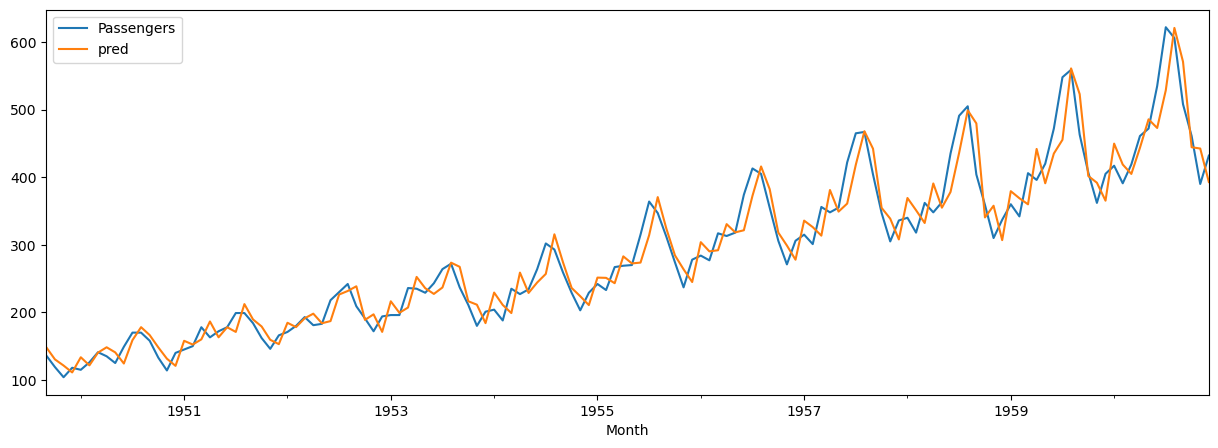

In [7]:
df['pred']=pred
df[['Passengers','pred']].plot(figsize=(15,5));

In [8]:
model.coef_

array([ 1.27977673, -0.54052079,  0.132786  , -0.20630209,  0.36413534,
       -0.20142107,  0.00536239,  0.15607896])

In [9]:
# Agora estimamos o mesmo modelo usando outro pacote
# Também por mínimos quadrados

results = OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Passengers   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                              1765.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                   4.95e-127
Time:                        17:19:30   Log-Likelihood:                         -653.57
No. Observations:                 136   AIC:                                      1323.
Df Residuals:                     128   BIC:                                      1346.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y_shift1       1.2896      0.088     14.640      0.000       1.115       1.464
y_shift2      -0.5440      0.147     -3.699      0.000      -0.835      -0.253
y_shift3       0.1360      0.156      0.872      0.385      -0.173       0.445
y_shift4      -0.2066      0.156     -1.323      0.188      -0.516       0.102
y_shift5       0.3669      0.157      2.333      0.021       0.056       0.678
y_shift6      -0.1982      0.160     -1.237      0.218      -0.515       0.119
y_shift7       0.0060      0.153      0.039      0.969      -0.298       0.310
y_shift8       0.1633      0.095      1.714      0.089      -0.025       0.352
==============================================================================
Omnibus:                        3.781   Durbin-Watson:                   2.146
Prob(Omnibus):                  0.151   Jarque-Bera (JB):                3.231
Skew:                           0.332   Prob(JB):                        0.199
Kurtosis:                       3.361   Cond. No.                         89.2
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

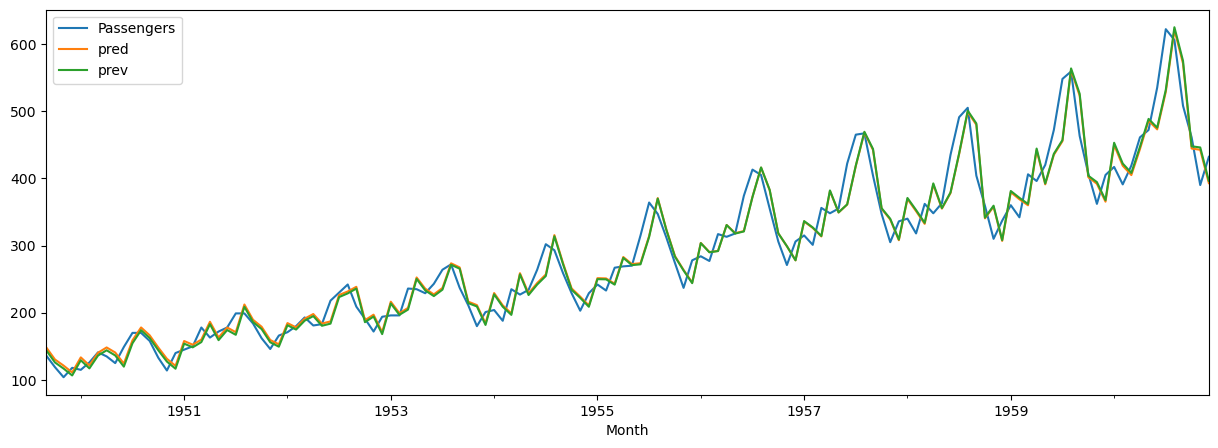

In [10]:
prev = results.predict(X);
df['prev']=prev
df[['Passengers','pred','prev']].plot(figsize=(15,5));

#### Vamos gerar um processo AR(3)

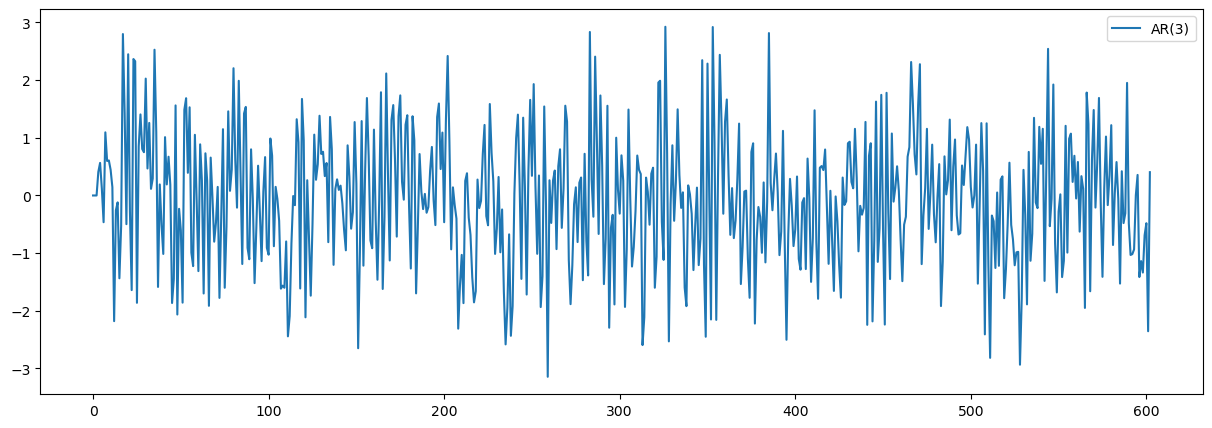

In [11]:
y0=[0,0,0]
coef = np.array([0.2,-0.3,0.4])
for t in range(600):
    y = coef[0]*y0[-1] + coef[1]*y0[-2] + coef[2]*y0[-3] + np.random.randn()
    y0.append(y)

plt.figure(figsize=(15,5))
plt.plot(y0,label='AR(3)')
plt.legend();

Visualmente, sabemos que é estacionário. Mas como mostrar que estatisticamente uma série qualquer é estacionária?

Existem alguns testes, mas vamos focar no mais conhecido e usado: **Teste de Dickey-Fuller** (ou teste da raiz unitária).

Ref: Gujarati, página 748.

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
adfuller(y0)

(-9.630864130161648,
 1.6136326008713612e-16,
 2,
 600,
 {'1%': -3.4412958288564814,
  '5%': -2.8663691131481484,
  '10%': -2.5693418027777777},
 1639.9105461506495)

In [14]:
def adresult(data):
    res = adfuller(data)
    print('Estatistica de teste:', res[0])
    print('P-valor:', res[1])
    if res[1]<0.05:
        print('Estacionária')
    else:
        print('Não estacionária')

In [15]:
adresult(y0)

Estatistica de teste: -9.630864130161648
P-valor: 1.6136326008713612e-16
Estacionária


In [16]:
adresult(df['Passengers'])

Estatistica de teste: 0.655697071995675
P-valor: 0.9889109651726847
Não estacionária


#### Médias Móveis MA(q)

É um modelo linear que agora depende de erros de períodos passados:

$y_t = \alpha + \epsilon_t + \theta_1 \epsilon_{t-1} + \theta_2 \epsilon_{t-2} + \ldots + \theta_q \epsilon_{t-q}$

#### Vamos gerar um MA(4)

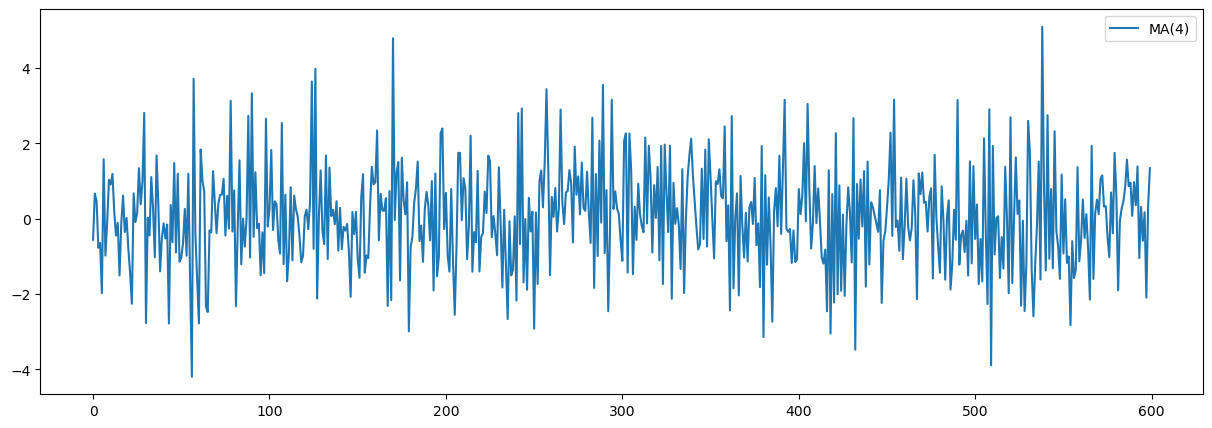

In [17]:
y0=[]
coef = np.array([0.2,-0.3,0.4,-0.8])
eps = np.random.randn(600)
for t in range(600):
    y = coef[0]*eps[t-1] + coef[1]*eps[t-2] + coef[2]*eps[t-3] + coef[3]*eps[t-4] + np.random.randn()
    y0.append(y)

plt.figure(figsize=(15,5))
plt.plot(y0,label='MA(4)')
plt.legend();

In [18]:
adresult(y0)

Estatistica de teste: -16.524823316223102
P-valor: 2.04863899094744e-29
Estacionária


Na hora de encontrar um modelo, como definimos $p$ e $q$ no modelo ARMA(p,q)?

Além disso, o modelo ARIMA(p,d,q) é usado para séries não-estacionárias ($d$ é a quantidade de defasagens), como escolher esses parâmetros?

#### Estacionariedade
Precisamos dessa propriedade, pois desejamos que a série tenha características básicas para todo o tempo, o que é útil para modelagem e previsão.

Uma série $\{y_t\}_{t=0}^T$ é dita estacionária se:

1 - Sua média não muda com o tempo, ou seja, $E(y_t) = \mu$ $\forall t \in \{0,\ldots,T\}$;

2 - Sua autocovariância não muda com o tempo;

* A covariância entre duas variáveis aleatórias é definida por $$Cov(X,Y) = E[(X-\mu_x)(Y-\mu_y)].$$
* A autocovariância é definida como $$Autocovariância = Cov(y_{t},y_{t-j}).$$
* Dizer que a autocovariância não muda com o tempo é o mesmo que dizer que para qualquer t, teremos $$E[(y_{t}-\mu)(y_{t-j}-\mu)] = \gamma_j$$ em outras palavras, ela só depende da distância $j$ entre as observações da série;
    
3 - Sua variância é igual em todo tempo, $\gamma_0 $.

#### Função de Autocorrelação (ACF)

A Correlação entre duas variáveis aleatórias é dada por: $$Corr(X,Y) = \frac{Cov(X,Y)}{\sigma_x \sigma_y}.$$

A Autocorrelação ficaria: $$Autocorr(y_{t},y_{t-j}) = \frac{Cov(y_{t},y_{t-j})}{\sigma_{y_t} \sigma_{y_{t-j}}}.$$

Mas note que para calcular a autocorrelação amostral precisaríamos de várias observações de cada variável $y_{t}, y_{t-j}$, o que é impossível, pois a série temporal é uma realização do processo estocástico.



Supondo que a série é estacionária, calculamos a função de autocorrelação para cada diferença (lag) $j$ como: 
$$\rho_j = \frac{1}{(T-j)\hat{\sigma}^2} \sum_{t=0}^{T-j}(y_t - \hat{\mu})(y_{t+j}-\hat{\mu})$$

#### Exemplo

Para o MA(2) temos a ACF dada por $\rho_1 = \frac{\theta_1 + \theta_1 \theta_2}{1 + \theta_1^2 + \theta_2^2}$, $\rho_2 = \frac{\theta_2}{1 + \theta_1^2 + \theta_2^2}$ e $\rho_j = 0$ para outros valores de j.

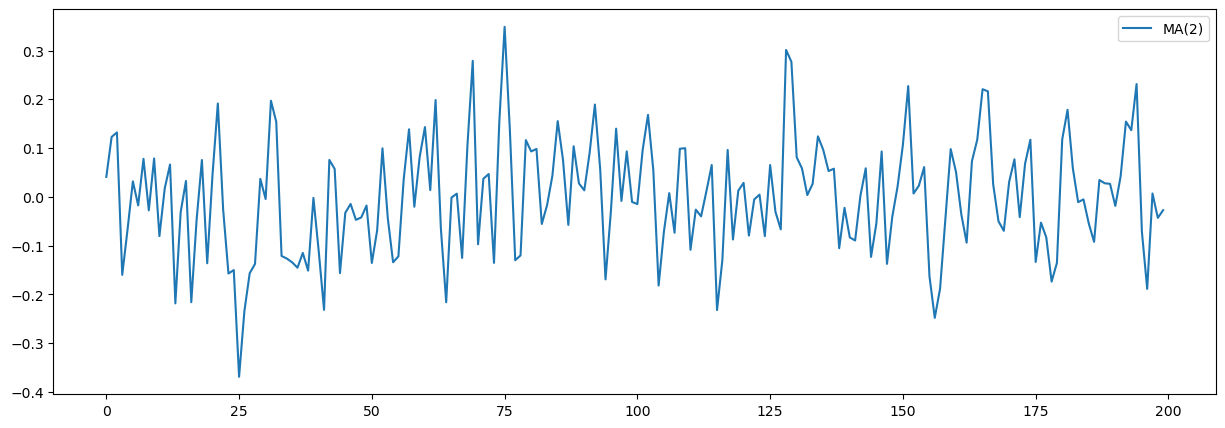

In [19]:
# MA(2)

y0=[]
coef = np.array([0.5,-0.3])
eps = 0.1*np.random.randn(200)
for t in range(200):
    y = coef[0]*eps[t-1] + coef[1]*eps[t-2] + eps[t]
    y0.append(y)
    
plt.figure(figsize=(15,5))
plt.plot(y0,label='MA(2)')
plt.legend();
    

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

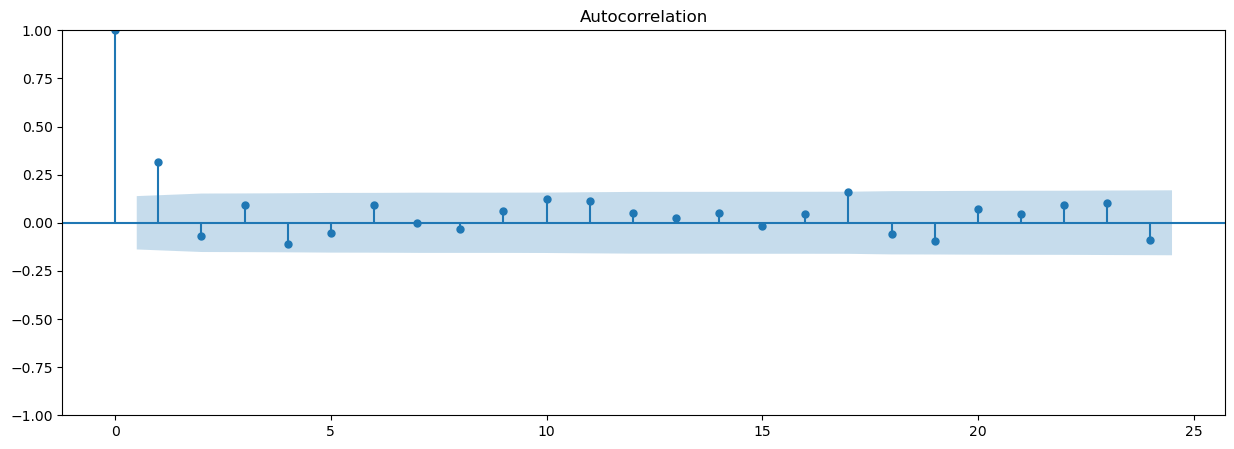

In [21]:
fig, ax = plt.subplots(figsize = (15,5))
plot_acf(np.array(y0), ax=ax);

#### Função de Autocorrelação Parcial (PACF)

PACF é a autocorrelação entre $y_{t}$ e $y_{t+j}$ **condicionada** à $y_{t+1}, y_{t+2}, \ldots, y_{t+j-1}.$ 

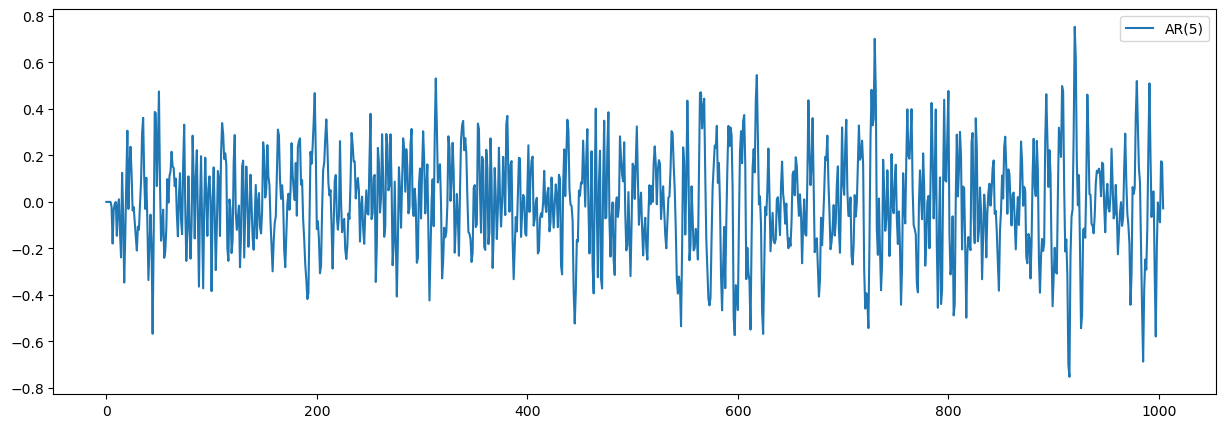

In [22]:
y0=[0,0,0,0,0]
coef = np.array([0.8,-0.4,0.1,0.4,-0.7])
for t in range(1000):
    y = coef[0]*y0[-1] + coef[1]*y0[-2] + coef[2]*y0[-3] + coef[3]*y0[-4]+ coef[4]*y0[-5]+0.1*np.random.randn()
    y0.append(y)

plt.figure(figsize=(15,5))
plt.plot(y0,label='AR(5)')
plt.legend();

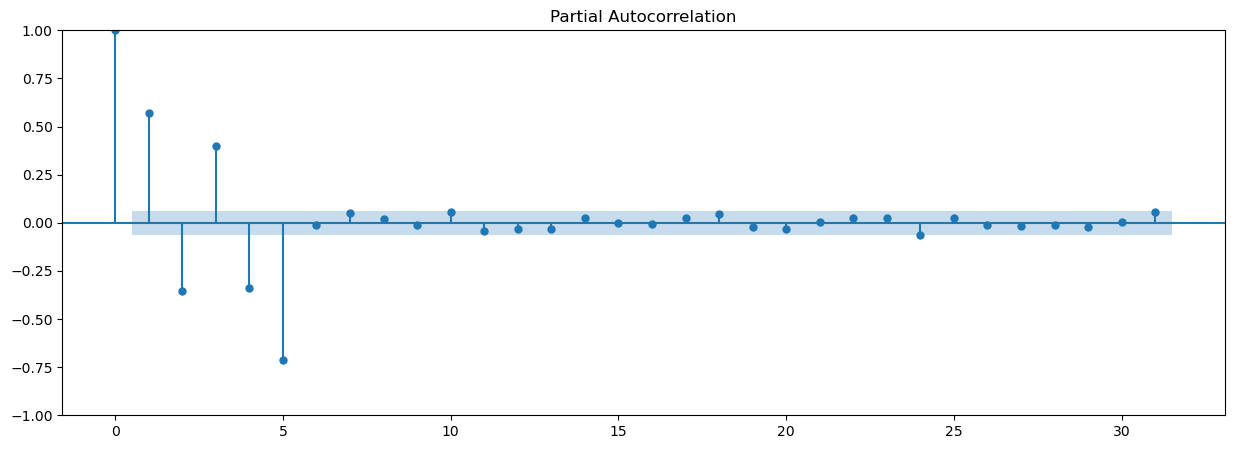

In [23]:
fig, ax = plt.subplots(figsize = (15,5))
plot_pacf(np.array(y0), ax=ax);

Para modelos ARMA(p,q) precisamos olhar os dois plots para definir as ordens.

Em tempos de machine learning e poder computacional, há o grid search...

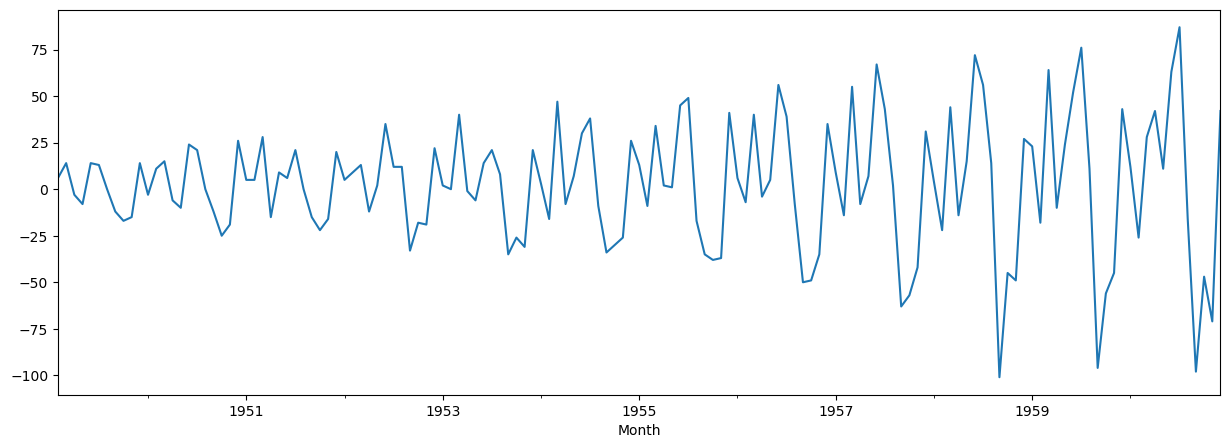

In [24]:
data['diff'] = data.Passengers.diff()
#data['logdiff'] = np.log(data.Passengers).diff()
data=data.dropna()
data['diff'].plot(figsize=(15,5));

In [25]:
adresult(data['diff'].dropna())

Estatistica de teste: -2.829266824169998
P-valor: 0.054213290283825676
Não estacionária


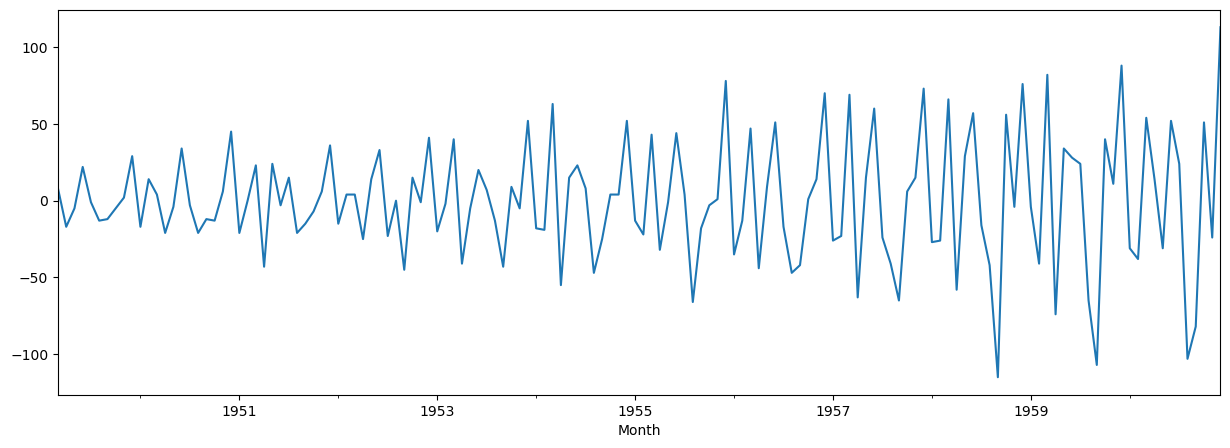

In [26]:
data['diff2'] = data['diff'].diff()
data=data.dropna()
data['diff2'].plot(figsize=(15,5));

In [27]:
adresult(data['diff2'].dropna())

Estatistica de teste: -16.384231542468516
P-valor: 2.7328918500141235e-29
Estacionária
